In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 데이터 불러오기
data = pd.read_csv('../data/merge/207_mackerel_product.csv')
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,수온(30m),염분(30m),용존산소(30m),수온(50m),염분(50m),용존산소(50m),생산량
date,,,,,,,
2008-01-01,15.75,33.650,5.52000,15.00,33.610,5.075,7994
2008-02-01,14.80,34.010,5.82000,14.40,33.990,5.420,1430
2008-03-01,14.30,33.985,5.74000,13.30,33.950,5.460,3001
2008-04-01,13.80,33.960,5.65000,12.20,33.910,5.500,1385
2008-05-01,14.35,34.070,5.24000,13.15,34.105,4.935,582
...,...,...,...,...,...,...,...
2022-08-01,20.00,32.820,3.87140,19.50,34.340,3.700,3900
2022-09-01,21.35,34.325,4.01425,20.90,34.145,4.400,5494
2022-10-01,21.70,33.030,4.45710,22.30,33.550,3.700,5339


In [8]:
# 시계열 데이터 선택
ts_data = data['수온(30m)']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(50, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Like

In [11]:
# 미래 값 예측
forecast_steps = 24  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)

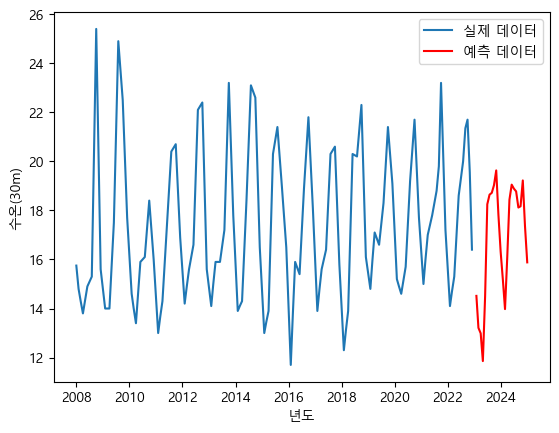

In [12]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast, label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('수온(30m)')
plt.show()

In [19]:
mse = mean_squared_error(ts_data[-forecast_steps:], forecast)
mae = mean_absolute_error(ts_data[-forecast_steps:], forecast)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 4.6759368812186795
Mean Absolute Error (MAE): 1.7276893413961705
Root Mean Squared Error (RMSE): 2.162391472703007


In [16]:
# 2024년 예측값 출력
print("2023~24년 예상 수온(30m) :", forecast)
pd.DataFrame(forecast).rename(columns={'predicted_mean':'수온(30m)'}).to_csv('../data/pred/predicted_values.csv',encoding='utf-8-sig')

2023~24년 예상 수온(30m) : 2023-01-01    14.511343
2023-02-01    14.040472
2023-03-01    15.218406
2023-04-01    15.915558
2023-05-01    16.578329
2023-06-01    17.507408
2023-07-01    18.548673
2023-08-01    19.038191
2023-09-01    19.747150
2023-10-01    20.798988
2023-11-01    19.373635
2023-12-01    18.191672
2024-01-01    16.847143
2024-02-01    15.351883
2024-03-01    16.113682
2024-04-01    16.752039
2024-05-01    17.279622
2024-06-01    17.150006
2024-07-01    18.218405
2024-08-01    19.224562
2024-09-01    19.656216
2024-10-01    21.594169
2024-11-01    19.967610
2024-12-01    17.769799
Freq: MS, Name: predicted_mean, dtype: float64
